<a href="https://colab.research.google.com/github/roshisaxena/traffic_sign_recognition/blob/main/TrafficRecognitionusingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Extracting the compressed dataset.
from zipfile import ZipFile

data_path = 'traffic-sign-dataset.zip'

with ZipFile(data_path, 'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
# path to the folder containing our dataset
dataset = '/content/traffic_Data/DATA'

# path of label file
labelfile = pd.read_csv('labels.csv')

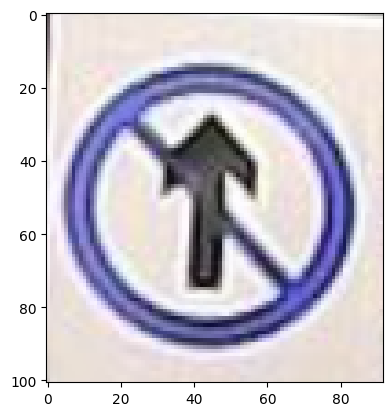

In [ ]:
# Visualize some images from the dataset
img = cv2.imread("/content/traffic_Data/DATA/10/010_0011.png")
plt.imshow(img)

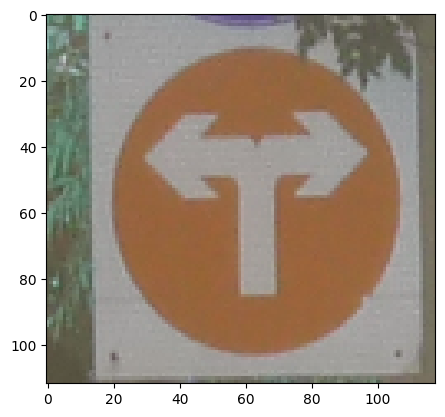

In [ ]:
img = cv2.imread("/content/traffic_Data/DATA/23/023_0001.png")
plt.imshow(img)

In [ ]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   224, 224),
                                                               seed=123,
                                                               batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 224, 224),
                                                             seed=123,
                                                             batch_size=32)

NameError: name 'tf' is not defined

In [ ]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
	class_names.append(labelfile['Name'][int(i)])


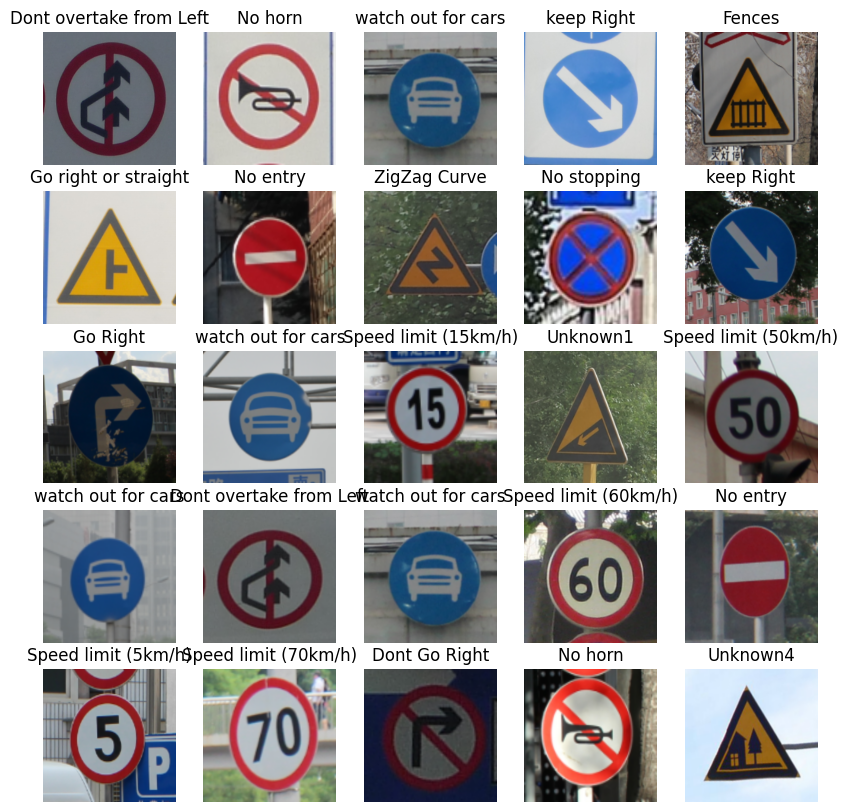

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical")  # No 'mode' argument needed
])


In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


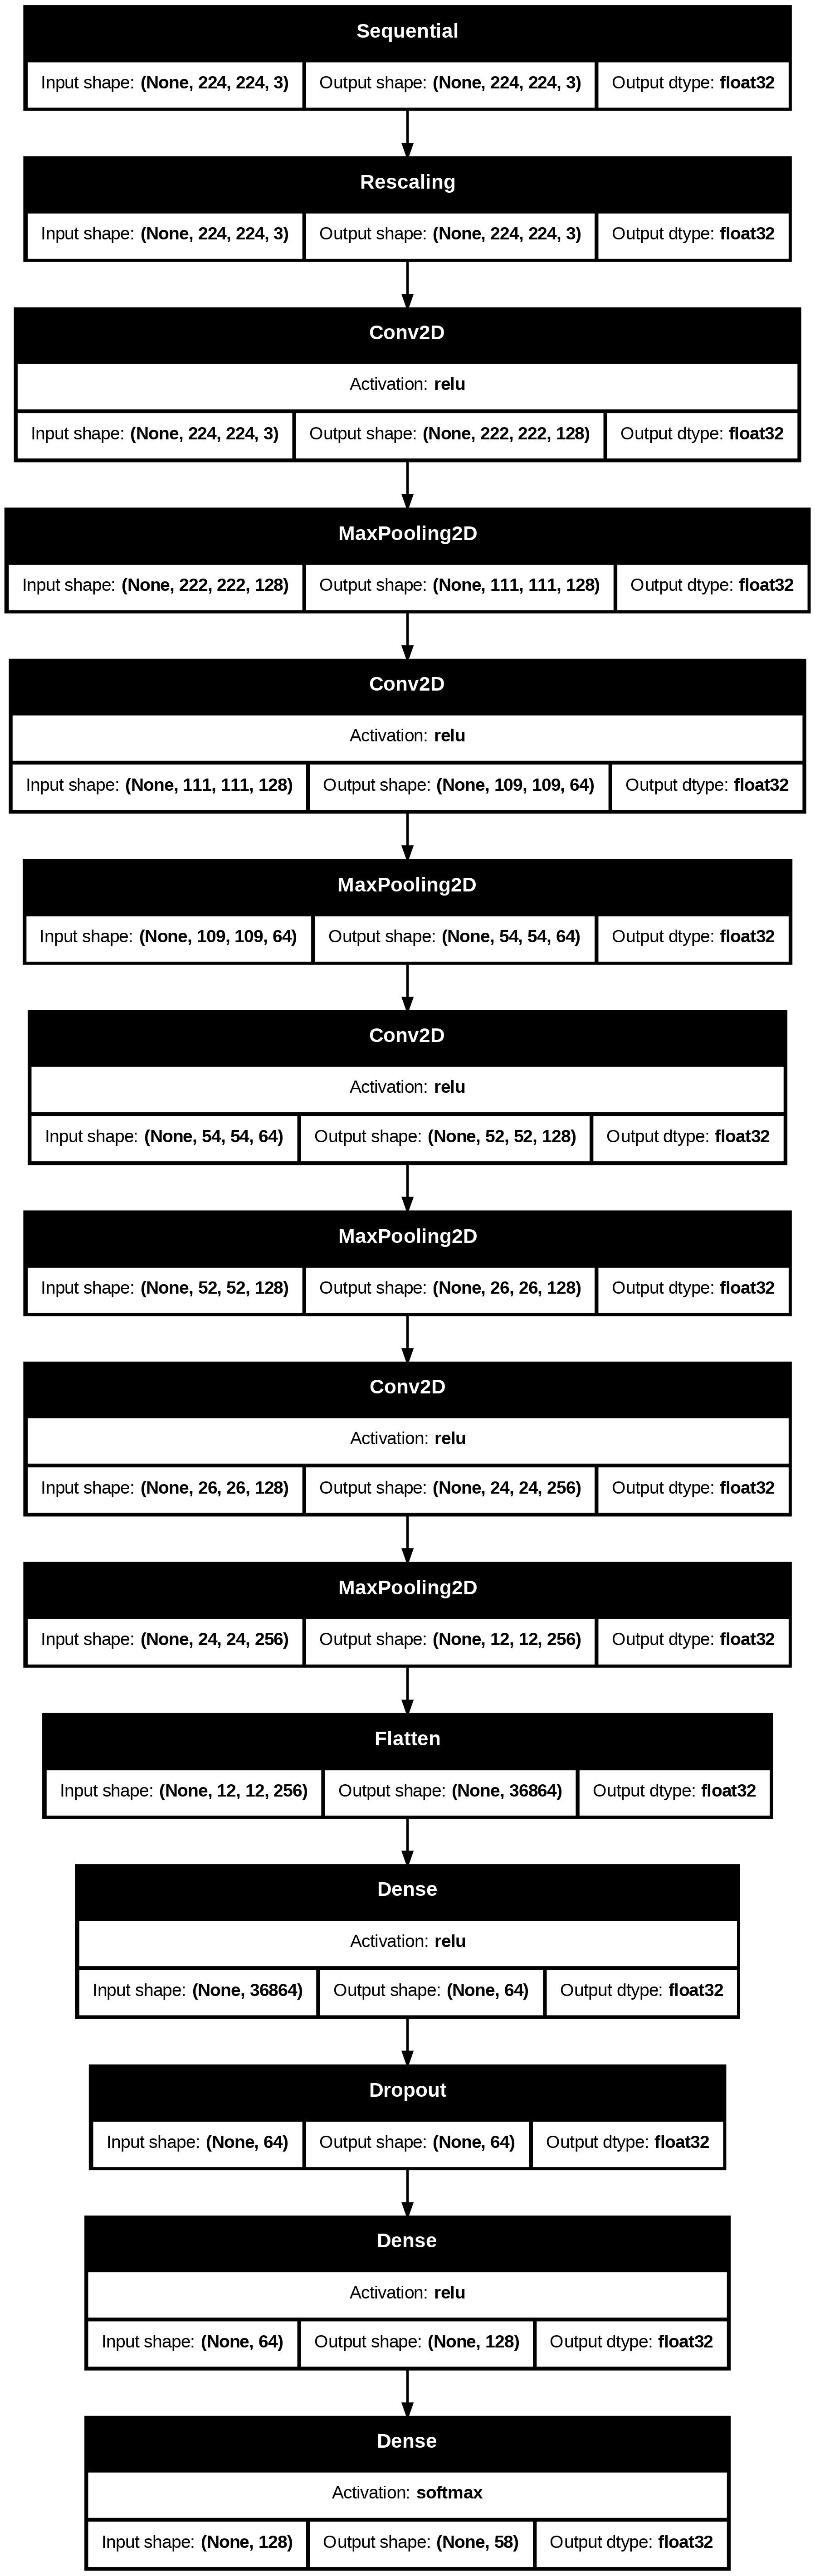

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
                 validation_data=val_ds,
                 epochs=50,
                 callbacks=mycallbacks)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.1229 - loss: 3.5647 - val_accuracy: 0.3141 - val_loss: 2.4040
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.3088 - loss: 2.3792 - val_accuracy: 0.4544 - val_loss: 1.7202
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.3848 - loss: 1.9659 - val_accuracy: 0.5312 - val_loss: 1.5567
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.4517 - loss: 1.7365 - val_accuracy: 0.5468 - val_loss: 1.4333
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.4719 - loss: 1.6738 - val_accuracy: 0.5600 - val_loss: 1.4609
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.4837 - loss: 1.5677 - val_accuracy: 0.6367 - val_loss: 1.2253
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.5270 - loss: 1.4855 - val_accuracy: 0.6307 - val_loss: 1.1602
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.5456 - loss: 1

In [ ]:
model.save("TrafficSign_model.h5")

In [ ]:
from google.colab import files
files.download('TrafficSign_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>